In [1]:
import lvm_read
import numpy as np
import pandas as pd
from scipy.stats import *
from scipy import pi
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import time
from collections import Counter
from numpy.fft import rfft, rfftfreq

In [2]:
brokenCage_file = 'C:/Users/intel/Desktop/Mtech_Proj/Digital twin_29 Jan 2021/dataset/BrokenCage.lvm'
Healthy_file = 'C:/Users/intel/Desktop/Mtech_Proj/Digital twin_29 Jan 2021/dataset/Healthy.lvm'


lvm_BrokenCage = lvm_read.read(brokenCage_file, read_from_pickle=False)
lvm_Healthy = lvm_read.read(Healthy_file, read_from_pickle=False)

In [7]:
Healthy_data_vib = lvm_Healthy[0]['data'][:,3]
Healthy_data_vib = pd.DataFrame(Healthy_data_vib)
df_BrokenCage = pd.DataFrame(lvm_BrokenCage[0]['data'])
df_BrokenCage = df_BrokenCage[:-1]
df_BrokenCage = df_BrokenCage.transform([lambda x:x[0], lambda x:x[1],lambda x:x[2],lambda x:x[3]]).set_axis(['time','vib','time','power'],
                  axis=1,inplace=False)
df_BrokenCage = df_BrokenCage['vib']

Text(0, 0.5, 'Vibration (g)')

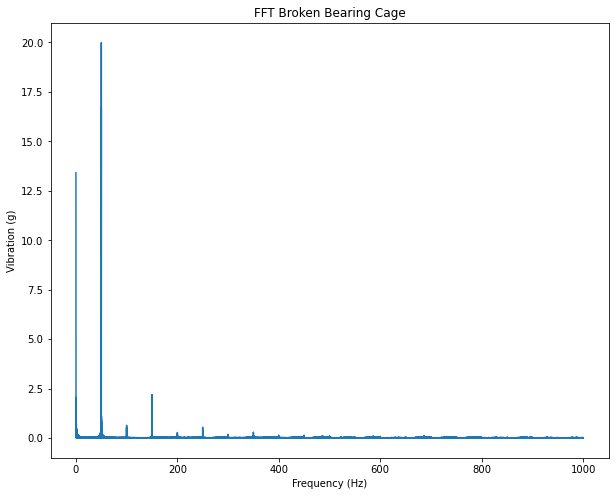

In [8]:
#FFT
N = df_BrokenCage.shape[0] 
f_s = 2000 #Sampling frequency
dt = 1.0 / f_s #inverse of sampling rate

y = df_BrokenCage.values.flatten() #to convert DataFrame to 1D array
    #acc value must be in numpy array format for half way mirror calculation
fft=rfft(y)*dt
freq=rfftfreq(N,d=dt)
FFT=abs(fft)
plt.figure(figsize=(10,8))
plt.plot(freq,FFT)
plt.title('FFT Broken Bearing Cage')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')

Text(0, 0.5, 'Vibration (g)')

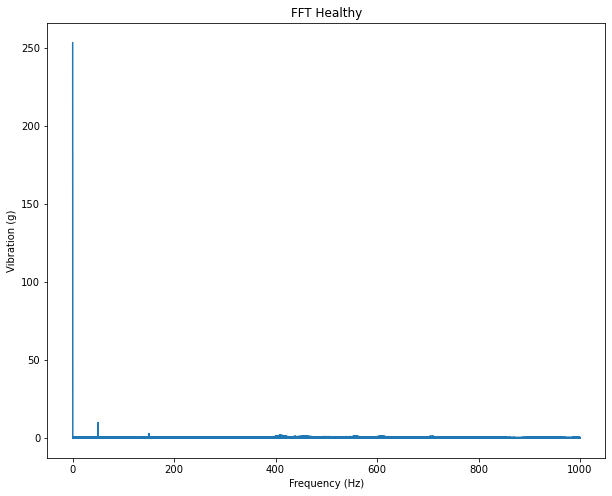

In [10]:
#FFT
N = Healthy_data_vib.shape[0] #data size=3600 data pts
f_s = 2000 #Sampling frequency
dt = 1.0 / f_s #inverse of sampling rate

y = Healthy_data_vib.values.flatten() #to convert DataFrame to 1D array
    #acc value must be in numpy array format for half way mirror calculation
fft=rfft(y)*dt
freq=rfftfreq(N,d=dt)
FFT=abs(fft)
plt.figure(figsize=(10,8))
plt.plot(freq,FFT)
plt.title('FFT Healthy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')